# Mini project - Mobile Phones dataset
### Bar Gamliel, Boaz Bellomo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## part 1

### 1) תיאור מסד הנתונים שנבחר

In [2]:
original_df = pd.read_csv('phones_data.csv')
original_df = original_df.drop(columns=['Unnamed: 0']) #no need for doble indexing
original_df.head()

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


המכשיר הסלולארי הפך להיות חלק אינטגרלי מחיי היום יום. אם בעבר רק חלק קטן מהאוכלוסיה היה מסתובב עם מכשיר טלפון נייד, היום מכשירים אלו הם נחלת הכלל. כמעט כל פעולה יומיומית דורשת גישה או שימוש במכשיר מסוג זה, ואף יש השלכות משפטיות וחוקיות לגישה למכשירים של אחרים.
במרוצת השנים, סוגים שונים של מכשירים יצאו, חלקם היו פופולרים יותר וחלק פופולרים פחות. למכשירים שונים ישנם סוגי חומרה ותוכנה מגוונים, מחירים שונים ותפוצה שונה. בפרויקט זה נרצה לבחון מה תורם לפופולרות של מכישר מסויים. נבחן זאת באמצעות מסד הנתונים שבחרנו המכיל מידע על טלפונים שהיו זמינים לרכישה באוקרינה. המסד מחזיק פרטים שונים על אותם טלפונים כגון הייצרן, תאריך יציאת הדגם, פרטים שונים על המחיר ועל רכיבי התוכנה והחומרה. 

### 2) תיאור הפיצ'רים במסד הנתונים

ראיני כי במקרים רבים ישנו תיאור של צבע המכשיר בתוך שם המודל שלו, נרצה לחלץ אותו ולהשתמש בו בזמן הניתוח. נציין, כי לכל צבע גוונים שונים בנתונים שלנו, אנחנו נתעלם מההבדל בגוונים.

In [3]:
# common color names
common_colors = ['Black', 'Blue', 'Pink', 'Red', 'Green', 'White', 'Gold', 'Silver', 'Gray', 'Charcoal', 'Yellow', 'Orange', 'Purple']

def extract_primary_color(model_name):
    for color in common_colors:
        if color.lower() in model_name.lower():
            return color
    return None

original_df['primary_color'] = original_df['model_name'].apply(extract_primary_color)


original_df[['model_name', 'primary_color']].head(10)

,model_name,primary_color
0,1 1/8GB Bluish Black (5033D-2JALUAA),Black
1,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Black
2,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Black
3,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Black
4,1.3 1/16GB Charcoal,Charcoal
5,10 6/64GB Black,Black
6,10 Lite 3/32GB Blue,Blue
7,10 Lite 4/64GB Black,Black
8,10 lite 3/128GB Blue,Blue
9,10 lite 3/64GB Black,Black


In [4]:
original_df.dtypes

brand_name         object
model_name         object
os                 object
popularity          int64
best_price        float64
lowest_price      float64
highest_price     float64
sellers_amount      int64
screen_size       float64
memory_size       float64
battery_size      float64
release_date       object
primary_color      object
dtype: object

brand_name - קטגורילי. מתאר את שם היצרן

model_name - קטגורילי. מתאר את שם דגם המכשיר

os - קטגורילי. מתאר את סוג מערכת ההפעלה של המכשיר

popularity - נומרי. מדרג את הפופולריות של המכשיר מבין כל המכשירים במסד הנתונים

best_price - נומרי. אין הסבר מספק במקור המידע, אך ככל הנראה מתאר את המחיר המשתלם ביותר בשכלול נתונים אחרים

lowest_price -  נומרי. המחיר הנמוך ביותר שהוצא עבור המכשיר במטבע אוקראיני

highest_price - נומרי. המחיר הגבוה ביותר שהוצא עבור המכשיר במטבע אוקראיני

sellers_amount - נומרי. כמות המוכרים אשר מוכרים את המכשיר באוקרינה

screen_size - נומרי. גודל המסך באינטשים

memory_size - נומרי. כמות הזיכרון בגיגה ביט

battery_size - נומרי. גודל הסלולה במילי אמפר לשעה

release_date - קטגורילי אורדינלי, מתאר את החודש בו יצא המכשיאר לשוק

primary_color - קטגורילי. מתאר את צבע המכשיר

### 3) תיאור כמות הנתונים במסד

In [5]:
num_duplicates = original_df['model_name'].duplicated().sum()
print(f"The number of duplicated entries based on the specified columns is {num_duplicates}")

The number of duplicated entries based on the specified columns is 156


In [6]:
num_duplicates = original_df[['model_name', 'os', 'best_price', 'lowest_price', 'highest_price', 'sellers_amount', 'screen_size', 'memory_size', 'battery_size', 'release_date']].duplicated().sum()
print(f"The number of duplicated considring all varubles is {num_duplicates}")

The number of duplicated considring all varubles is 156


ממעבר על הנתונים, ראינו כי קיימים כפילויות של דגמי מכשירים. יכולים להיות לכך מספר סיבות, לדוגמא הבדלים בין הדגמים שאינם מופעים במסד, או הטיית מדידה. אנחנו נניח כי קרתה פה הטיית מדידה, משום שערכי כל שאר הפיצ'ים זהים, למעט הפופולריות (שממוספרת ככמות המכשירים במסד). לכן נרצה למחוק את הכפילויות ולתת להן את ערך הפופולריות הממוצעת של כל קבוצת כפילויות.

In [7]:
mean_popularity = original_df.groupby('model_name')['popularity'].mean()
df = original_df.drop_duplicates(subset='model_name').copy()
df['popularity'] = df['model_name'].map(mean_popularity)

In [8]:
len(original_df)

1224

In [9]:
len(df)

1068

במסד הנתונים המקורי היו 1224 רשומות, לאחר הורדת הכפילויות נותרנו עם 1068 רשומות - דגמי טלפונים שונים

In [10]:
missing_values = df.isnull().sum()
missing_values

brand_name          0
model_name          0
os                163
popularity          0
best_price          0
lowest_price      207
highest_price     207
sellers_amount      0
screen_size         2
memory_size        94
battery_size       10
release_date        0
primary_color      89
dtype: int64

קיימים מספר לא קטן של חוסרים בנתונים בפיצ'רים שונים. נחלק את הפיצ'רים עם החוסרים ל2 קטגרויות ונתמודד עם כל אחת מהן בנפרד - פיצ'רים עם חוסרים מועטים ופיצ'רים עם חוסרים רבים.

קיימות 2 רשומות בהן חסר גודל המסך ו10 רשומות בהן חסר גדול הסוללה. מספר הרשומות בהן המידע חסר הוא זניח לגדול מסד הנתונים ולכן נוכל להתעלם מהרשומות האלו מבלי לפגוע במחקר שלנו.

ברשומות של "מערכת הפעלה", "מחיר גבוה", "מחיר נמוך" ו"גודל זכרון" ישנם חוסרים רבים הנעים בין כ 10%-20% מהנתונים בכל אחד מהפיצ'רים האלו. ישנן מספר דרכים להתמודד עם החוסרים האלו:

1. התעלמות מהרשומות עם החוסרים. הבעיה עם השיטה הזו היא שמספר החוסרים הוא גדול ובמינימים נאבד כ20% מהנתונים שלנו
2. למלא את החוסרים בממוצע או החציון של העמודה שלהם. הבעיה עם השיטה הזו היא שחלק מהעמודות הן לא נומריות ולכן אין להן ממוצע או חציון, ואלו שכן נומריות, נראה בהמשך שההתפלגות היא לא נורמאלית ולכן השלמה זו תעוות את הנתונים שלנו.
3. למלא ערך רנדומלי בין הערך המינימלי או המקסימלי במקרה והמשתנה נומרי, או ערך רנדומלי לפי ההתפלגות אם המשתנה קטגורילי. שיטה זו בעייתית משום שהיא לא שומרת על היחסים בין המשתנים השונים (נראה מאוחר יותר כי קיימות קורולציות בין המשתנים) וגם קיימים ערכים קיצוניים להתפלגות, ולכן ערך רנדומלי בניהם לא ייצג נכונה את ההתפלגויות.

עקב הבעיות בשיטות השונות נשתמש בערכים שבהם יש מעט או אין בכלל חוסרים במקומות שניתן במקום אלו שיש בהם חוסרים רבים (כמו במחיר), ובמקומות שלא ניתן נקבל החלטות בהתאם לסוג הניתוח שנעשה.

## part 2

### 1) התפלגות נתונים

נרצה לראות באמצעות מדדים שונים אילו תכונות מאפיינות את רוב או חלק גדול מהמכשירים בנתונים שיש לנו. מאוחר יותר, נרצה לראות אם אכן התוכונת הנפוצות יותר משפיעות על הפופולריות של המכשיר.

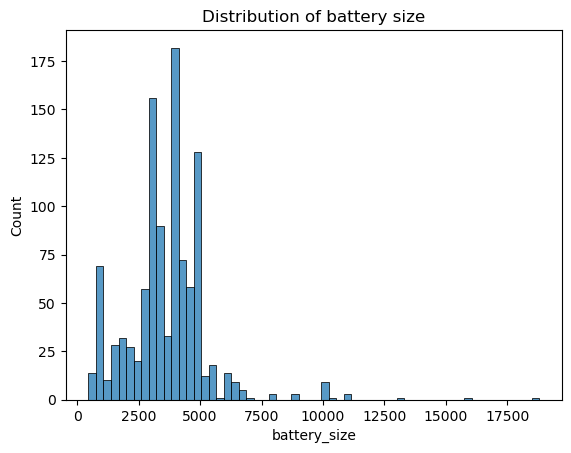

battery size mean is: 3656.4499054820417 and the median is: 3755.0


In [11]:
sns.histplot(df['battery_size'].dropna())
plt.title('Distribution of battery size')
plt.show()

print('battery size mean is:',df['battery_size'].mean(), "and the median is:", df['battery_size'].median())

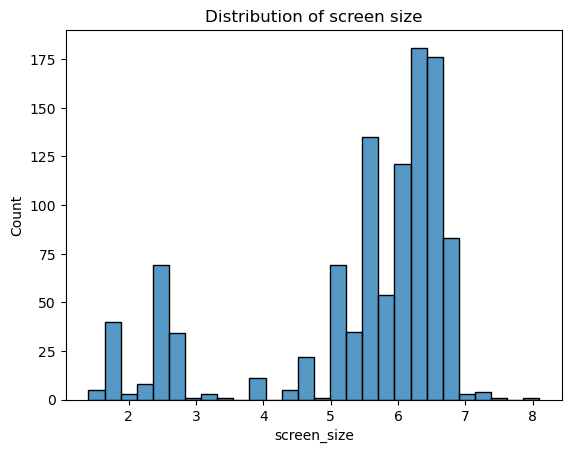

screen size mean is: 5.4460412757973735 and the median is: 6.0


In [12]:
sns.histplot(df['screen_size'].dropna())
plt.title('Distribution of screen size')
plt.show()

print('screen size mean is:',df['screen_size'].mean(), "and the median is:", df['screen_size'].median())

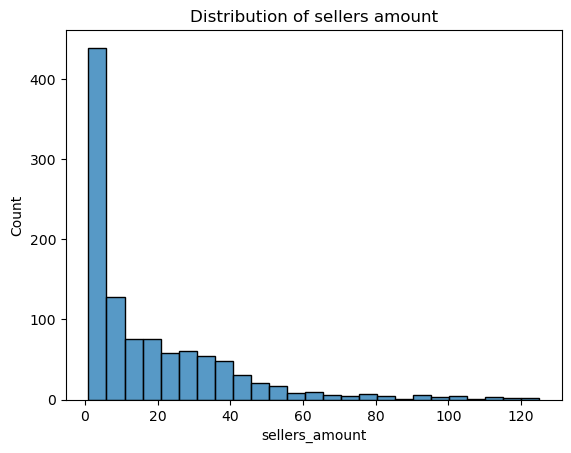

sellers amount mean is: 17.8876404494382 and the median is: 9.0


In [13]:
sns.histplot(df['sellers_amount'].dropna())
plt.title('Distribution of sellers amount')
plt.show()

print('sellers amount mean is:',df['sellers_amount'].mean(), "and the median is:", df['sellers_amount'].median())

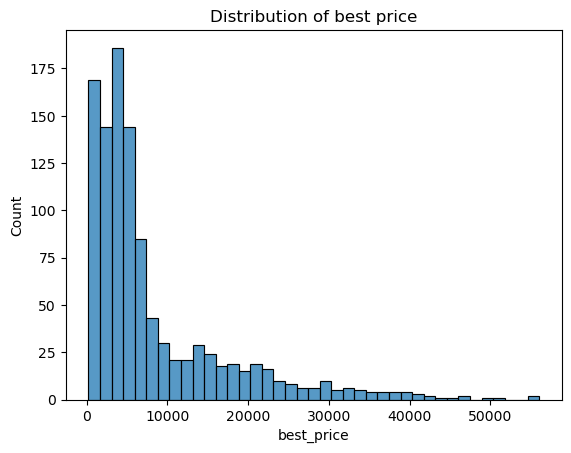

best price mean is: 8319.705992509364 and the median is: 4954.0


In [14]:
sns.histplot(df['best_price'].dropna())
plt.title('Distribution of best price')
plt.show()

print('best price mean is:',df['best_price'].mean(), "and the median is:", df['best_price'].median())

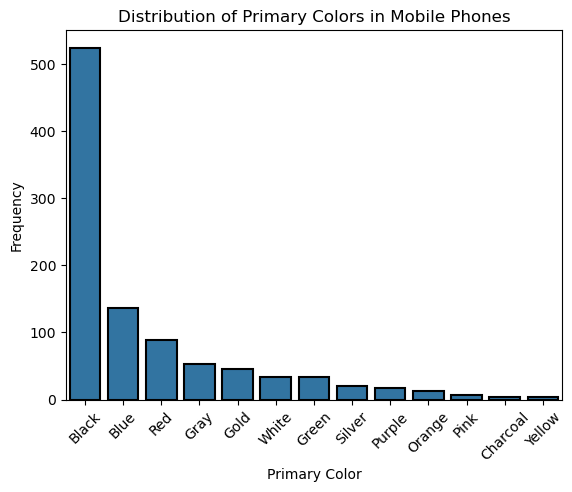

In [15]:

color_distribution = sns.countplot(data=df, x='primary_color', palette=[sns.color_palette()[0]], order=df['primary_color'].value_counts().index, edgecolor='black', linewidth=1.5)
plt.title('Distribution of Primary Colors in Mobile Phones')
plt.xlabel('Primary Color')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


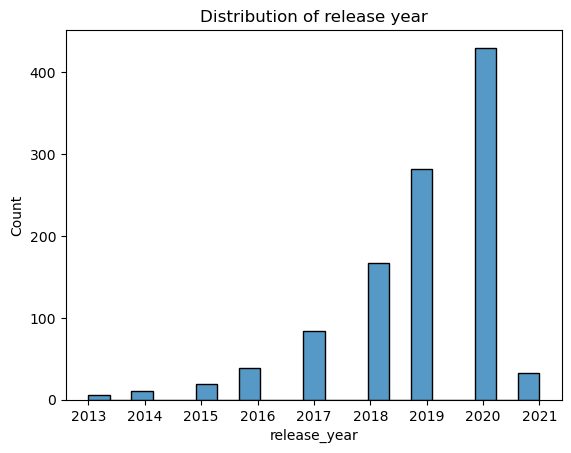

In [16]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
df[['release_date', 'release_year']].head()

sns.histplot(df['release_year'].dropna())
plt.title('Distribution of release year')
plt.show()

In [17]:
df['release_date'].max()

Timestamp('2021-02-01 00:00:00')

המהגמה המורחבת היא שככל שהשנה גדולה יותר כך ישנם יותר דגמי טלפונים. עם זאת, נראה כי בשנת 2021 ישנו שינוי. את השינוי ניתן להסביר בכך שהמידע "קטום מימין". מהתבוננות במידע ניתן לראות כי האיסוף נגמר בחודש פברואר 2021, ולכן ישנם פחות דגמים משנה זו בנתונים.
נשים לב לעניין נוסף, רוב המכשירים יצאו הבשנים מאוחרות יותר, מה שגורם לחוסר איזון בנתונים

### 2) קורולציה בין נתונים

בסעיף הקודם אמרנו שיכולה להיות בעייתיות כאשר נבחן את הפופלריות בתלות בשנת יצאית המכשיר. נבחן מקרה זה ונראה אם קיים קשר ואיך נצתרך לבחון אותו בראי הבעיתיות שציינו. נציין כי אנחנו מצפים לראות קשר חזק בין שנת יציאת המכשיר לבין הפופלריות שלו.

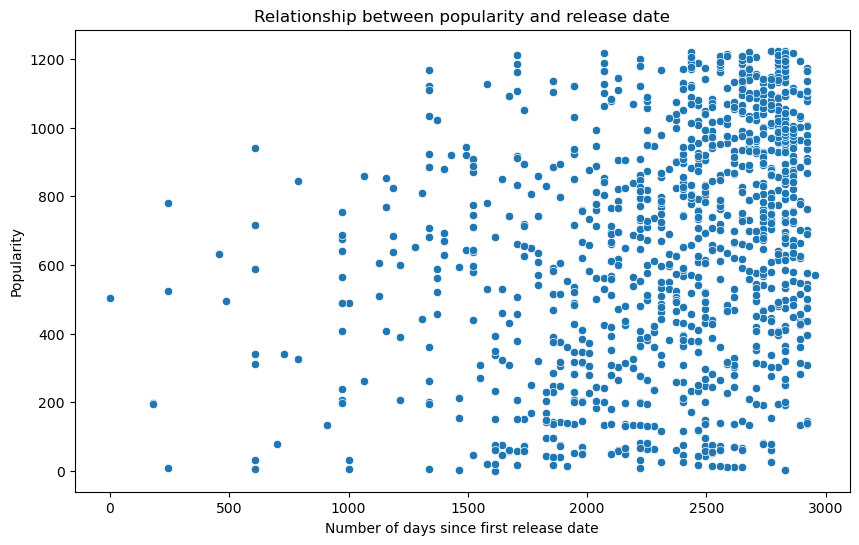

0.3152615081116024

In [18]:
# Converting the release_date to release_date - days from first release, so we can use it for correlation
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_days'] = (df['release_date'] - df['release_date'].min()).dt.days

plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_days', y='popularity', data=df)
plt.title('Relationship between popularity and release date')
plt.xlabel('Number of days since first release date')
plt.ylabel('Popularity')
plt.show()

correlation_popularity_release_date = df['popularity'].corr(df['release_days'])
correlation_popularity_release_date

קיבלנו כי קיימת קורולציה חיוביות, עם זאת, קורולציה של 0.31 היא לא מאוד חזקה. התוצאה היא אכן דומה למה שציפינו על אף שציפינו לקורולציה חזקה יותר. דבר זה יכול להצביע על כך שישנם יותר גורמים התורמים לפופולריות של מכשיר מאשר ה"חדשנות" שלו.

נבחן את הקשר בין המחיר "הטוב ביותר" של המכשיר לבין הפופלריות שלו. ראינו כי רוב המכשירים הם בטווח המחירים הנמוכים יותר, לכן אנחנו מצפים כי מכשירים אלו יהיו פופלרים יותר - ושנראה קורולציה שלילית.

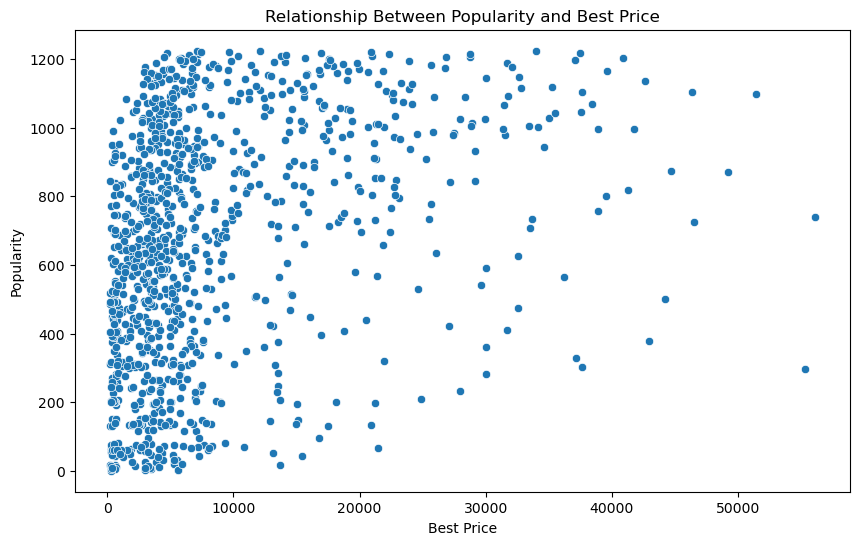

0.34416605746513085

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='best_price', y='popularity', data=df)
plt.title('Relationship Between Popularity and Best Price')
plt.xlabel('Best Price')
plt.ylabel('Popularity')
plt.show()

correlation_popularity_best_price = df['popularity'].corr(df['best_price'])
correlation_popularity_best_price

התוצאות שקיבלנו הפתיעו אותנו. קיבלנו קורלציה חיובות מה שאומר שככל שהמכשיר יקר יותר כך הוא יותר פופלרי, על אף שהקורולציה היא סביב 0.34 ולא מאוד חזקה.

בעקבות הפתעה זו נרצה לבחון האם יש גורמים אחרים המשפיעים על המחיר, נבדוק לדוגמא את הקורלציה בין זיכרון למחיר

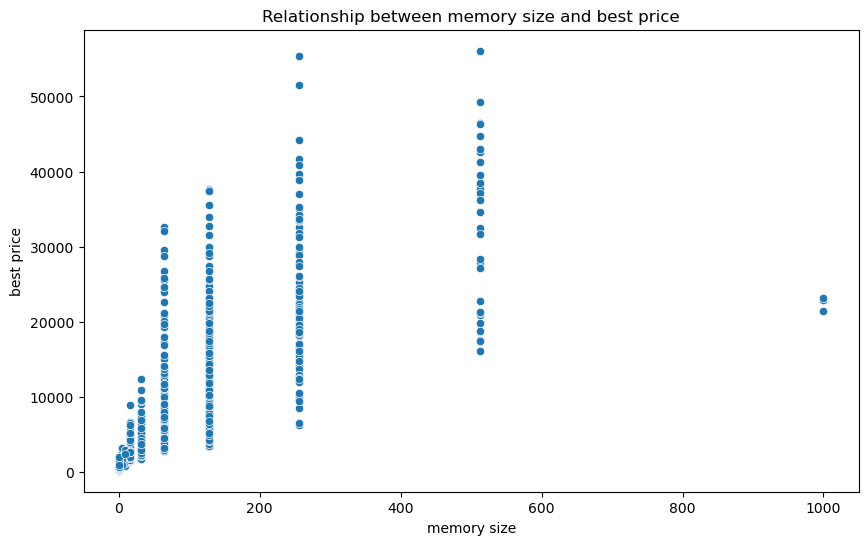

0.7115133191866106

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='memory_size', y='best_price', data=df)
plt.title('Relationship between memory size and best price')
plt.xlabel('memory size')
plt.ylabel('best price')
plt.show()

correlation_popularity_release_date = df['memory_size'].corr(df['best_price'])
correlation_popularity_release_date

ביצענו בדיקה על מנת לראות האם יתכן כי לקוחות קונים פלאפונים יקרים בגלל שהם טובים יותר (למשל, זיכרון גדול)

על אף החוסרים בערכי הזיכרון, בחרנו להציג קורלציה זו ומכיוון שקיבלנו קורלציה חזקה דיו, נוכל להסיק כי על אף החוסרים, קיימת קורלציה בין גודל הזיכרון למחיר ולכן לקוחות שירצו פלאפונים עם זכרון גדול יותר ייאלצו לשלם יותר.

נרצה לבחון את הקשר בין צבע המכשיר לבין הפופולריות שלו. נשים לב כי חסרים כ90 רשומות, אין דרך להשלים את הרשמות בצורה נכונה, לכן נבחר להתעלם מהמכשירים ללא הצבע. משום שהחוסרים הם פחות מ10% נוכל להשתמש במסקנות מהבדיקה, אך עלינו לקחת את חוסרים אלו בחשבון.
נבחן תחילה את הפופולריות הממוצעת של כל צבע

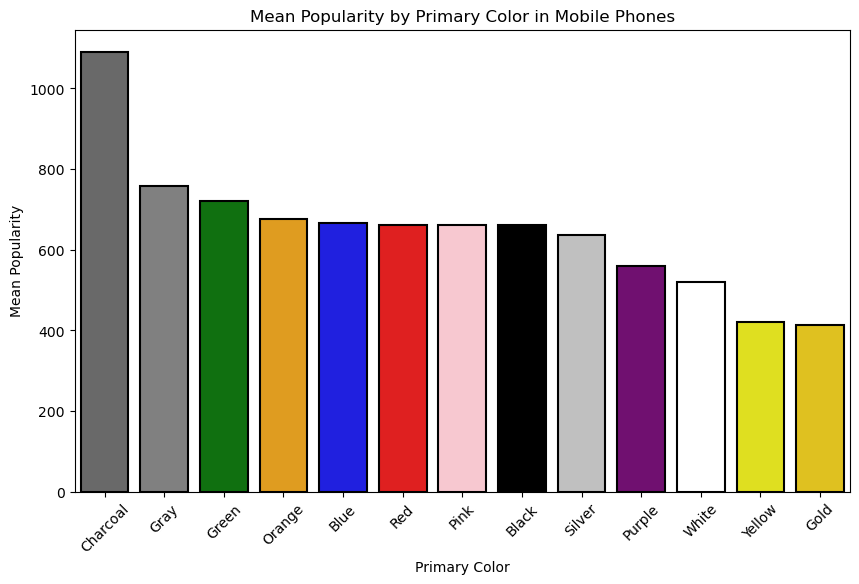

In [21]:
color_popularity_summary = df.groupby('primary_color')['popularity'].mean().reset_index()
color_popularity_summary = color_popularity_summary.sort_values(by='popularity', ascending=False)
color_model_count = df['primary_color'].value_counts().reindex(color_popularity_summary['primary_color'])

# give boxes the same color that they represent
color_map = {
        'Black': 'black',
        'White': 'white',
        'Blue': 'blue',
        'Red': 'red',
        'Green': 'green',
        'Yellow': 'yellow',
        'Orange': 'orange',
        'Purple': 'purple',
        'Pink': 'pink',
        'Gray': 'gray',
        'Silver': 'silver',
        'Gold': 'gold',
        'Charcoal': 'dimgray'
}

plt.figure(figsize=(10, 6))
sns.barplot(data=color_popularity_summary, x='primary_color', y='popularity', palette=color_map, order=color_popularity_summary['primary_color'], edgecolor='black', linewidth=1.5)
plt.title('Mean Popularity by Primary Color in Mobile Phones')
plt.xlabel('Primary Color')
plt.ylabel('Mean Popularity')
plt.xticks(rotation=45)
plt.show()



ניזכר בגרף שציירנו מוקדם יותר שמייצג את כמות המכשירים בכל אחד מהצבעים, שם ראינו כי יש חוסר איזון בכמות המכשירים שיש בכל אחד מהצבעים. נשתמש בגרף קופסאות על מנת לקבל ראיה יותר מדוייקת של הפופלריות של כל אחד מהצבעים

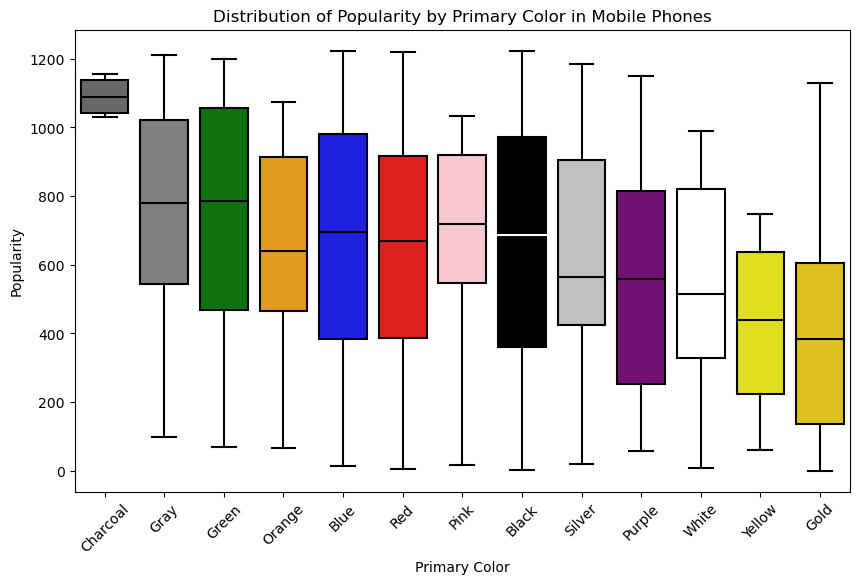

In [22]:
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(data=df, x='primary_color', y='popularity', palette=color_map, order=color_popularity_summary['primary_color'])
plt.title('Distribution of Popularity by Primary Color in Mobile Phones')
plt.xlabel('Primary Color')
plt.ylabel('Popularity')
plt.xticks(rotation=45)

# make black median line white
black_index = color_popularity_summary['primary_color'].tolist().index('Black')
ax = plt.gca()
black_median_line = ax.lines[black_index * 6 + 4]
black_median_line.set_color('white')

plt.show()


מהגרף ראינו שמכשירים בצבע פחם כולם פופולרים מאוד, אך חשוב לזכור שאנחנו יודעים שיש מעט מעוד מהם בנתונים שלנו. כמו כן אנחנו רואים שיש מכשירים פופלארים מאוד בכמעט כל צבע, אם זאת לדוגמא, לרוב מכשיר ירוק יהיה פופולרי יותר ממכשיר צהוב וזאת לפי החציון הפופולרי של כל אחד מהם. בנוסף, מכשירים זהובים וצהובים לרוב הכי פחות פופולרים, על אף שישנה שונות מאוד גדולה במכשירים הזהובים.

## part 3

### 1) הגדרת השערה

מניסיונו האישי - "דומיין נולג'" מכשירים גדולים יותר הם לרוב פופולרים יותר. נרצה לבחון אם השארה זו נכונה. לשם כך, נגדיר מכשיר גדול כמשיר עם מסך מעל 5 אינץ'.

### 2) הגדרת ההשערות

H0 - הפופלריות הממצועת בין מכשירים עם מסך גדול (מעל 5 אינץ') לבין מכשירים עם מסך קטן (מתחת ל5 אינץ') היא זהה

H1 - הפופלריות הממצועת בין מכשירים עם מסך גדול (מעל 5 אינץ') לבין מכשירים עם מסך קטן (מתחת ל5 אינץ') היא שונה

### 3) בחינת השערות

The 99% boostsrap confidence interval for difference between population means [180.7956160777564, 292.90402430854624]


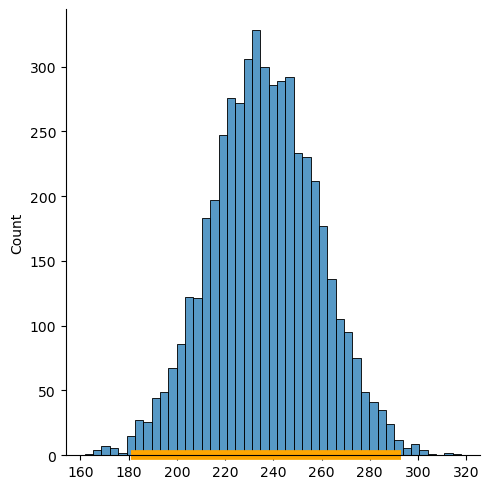

In [23]:
# Creating the new columns based on screen size
df['is_big_phone'] = np.where(df['screen_size'] > 5, 'yes', 'no')

# function that returns the difference in popularity averages
def diff_of_avgs(df, column_name, grouping_var):
    grpby_var = df.groupby(grouping_var)
    avgs = grpby_var[column_name].mean()
    return avgs.loc['yes'] - avgs.loc['no']  


def bootstrap_mean_difference(original_sample, column_name, grouping_var, num_replications):
    original_sample_size = original_sample.shape[0]
    original_sample_cols_of_interest = original_sample[[column_name, grouping_var]]
    bstrap_mean_diffs = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample_cols_of_interest.sample(original_sample_size, replace=True)
        resampled_mean_diff = diff_of_avgs(bootstrap_sample, column_name, grouping_var)
        bstrap_mean_diffs[i] = resampled_mean_diff
    return bstrap_mean_diffs

# run the bootstrap procedure
bstrap_diffs = bootstrap_mean_difference(df, 'popularity', 'is_big_phone',  5000)

# Get the endpoints of the 95% confidence interval
left_end = np.percentile(bstrap_diffs, 0.5, method='higher')
right_end = np.percentile(bstrap_diffs, 99.5, method='higher')
print('The 99% boostsrap confidence interval for difference between population means', [left_end,right_end])

# visualize results
ax = sns.displot(bstrap_diffs)
plt.hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=7, clip_on=False);

ניתן  לראות כי 0 לא נמצא ברווח הסמך, לכן נדחה את השערת ה0 - שאומרת כי הפופולריות של מכשירים גדולים ומכשירים קטנים היא זהה. תוצאת מבחן בדיקת ההשערות מחזקת את הטענה שהעלנו לפני המבחן. אם זאת, לא ניתן להגיע למסקנה חד משמעית עם מבחן מסוג זה, משום שלא בוצע נסיוי רשמי.

## part 4

נרצה לאמן מסווג שבהינתן מספר משתנים שונים יוכל לשערך את הפופולריות של מכשיר חדש שיכנס לשוק. ננסה לסווג מכשיר חדש ולראות אם הוא יהיה בחציון הראשון של המכשירים הפופולרים בשוק.
נחפש את המשתנים הטובים היותר. נשתמש ב"טבלת חום" עבור המשתנים הנומרים.
לא נשתמש במשתנה של תאריך יציאת המכשיר כי החברה לא שולטת בתאריך יציאת המכשיר - הוא תמיד יהיה החדש ביותר כשהוא יצא.

In [24]:
from sklearn.model_selection import train_test_split
# split to train and test set

shuffled_df = df.sample(frac=1, random_state=42)
df_train, df_test = train_test_split(shuffled_df, test_size=0.2)

C:\Users\boazb\AppData\Local\Temp\ipykernel_12856\3178363212.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


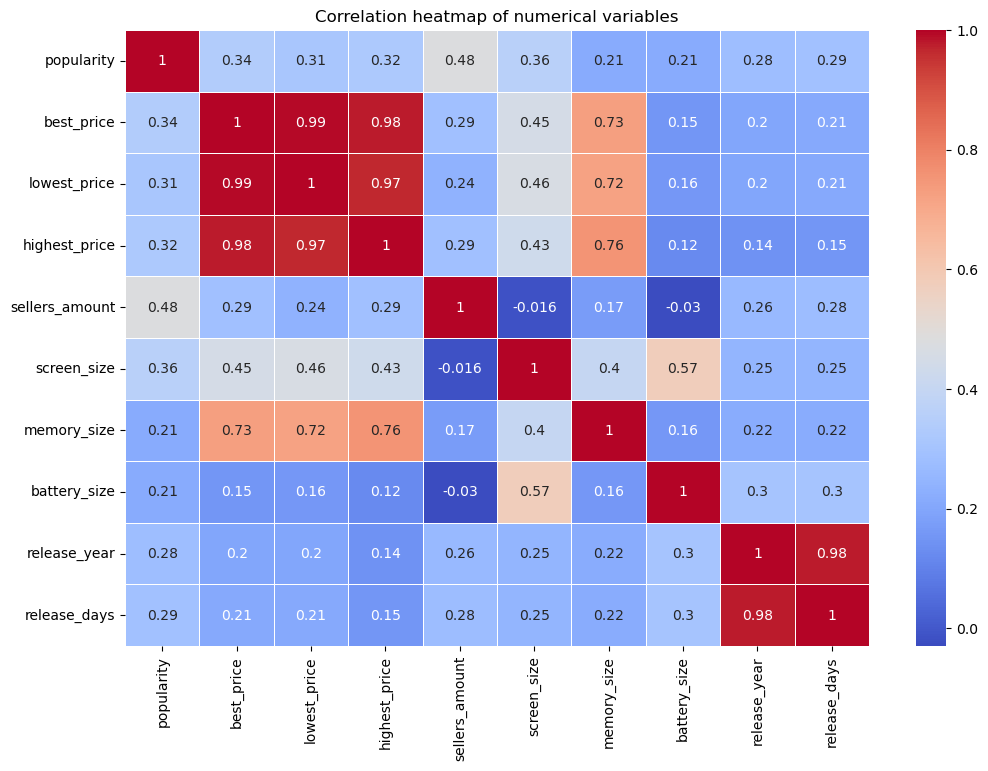

In [25]:
import warnings
correlation_matrix = df_train.corr()

warnings.filterwarnings("ignore")
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation heatmap of numerical variables')
plt.show()

נשים לב כי הקורולציות בין המחיר הטוב ביותר לבין המחיר הגבוה והמחיר הנמוך מאוד גבוהות - כמעט 1. משום שקיימים נתונים חסרים רבים גם במחיר הגבוה וגם במחיר הנמוך, נבחר לעבוד רק עם המחיר הטוב יותר.

נבחר לאמן את המסווג על כל שאר המשתנים, למעט גודל הזיכרון. נבחר שלא להשתמש בגודל הזיכרון משום שהוא בעל הקורולציה הנמוכה ביותר מכל המשתנים וגם יש לו חוסרים רבים. סיבה נוספת לוותר אליו כי אנחנו משתמש ב4 משתנים שונים ונרצה להימנע מקללת המימדים משום שיש לנו רק 1068 רשומות

נשים לב כי הקורולציות בין המשתנים שבחרנו לבין משתנה ה"פופלריות" לא מאוד חזקות, ולכן נצפה כי המסווג לא יהיה חזק במיוחד. אם זאת, אנחנו חושבים שהמסווג הזה הוא חשוב מאוד למרות הבעיות שאחנו צופים, כי חברות הטלפונים מעוניינות בסוף בפופולריות של המכשיר וזה המניע המרכזי שלהן כאשר הן מוציאות מכשיר חדש לשוק ועובדות על הפיתוח שלו. לכן גם מסווג לא מושלם יהיה שימושי מאוד.

In [26]:
# preproces
# 1. Remove rows with missing values in the columns of interest
df_train_clean = df_train.dropna(subset=["best_price", "sellers_amount", "screen_size", "battery_size"])
df_test_clean = df_test.dropna(subset=["best_price", "sellers_amount", "screen_size", "battery_size"])


# 2. Define rows with popularity values between 1 and 150 as "popular" and the rest as "not popular"
df_train_clean['popularity_label'] = df_train_clean['popularity'].apply(lambda x: 1 if 612 <= x <= 1224 else 0)
df_test_clean['popularity_label'] = df_test_clean['popularity'].apply(lambda x: 1 if 612 <= x <= 1224 else 0)


# 3. remove un relevent columns from df and shuffel
features = ["best_price", "sellers_amount", "screen_size", "battery_size", "popularity_label"]
relevant_df_train = df_train_clean.loc[:, features]
relevant_df_test = df_test_clean.loc[:, features]

In [27]:
# split to test and train

# define which variables are the features and which are the labels
X_train = relevant_df_train[["best_price", "sellers_amount", "screen_size", "battery_size"]]  # features
Y_train = relevant_df_train["popularity_label"]  # labels

X_test = relevant_df_test[["best_price", "sellers_amount", "screen_size", "battery_size"]]  # features
Y_test = relevant_df_test["popularity_label"]  # labels

In [28]:
from sklearn.preprocessing import StandardScaler
# scaling

df_columns = X_train.columns
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_df = pd.DataFrame(scaled_X_train, columns=df_columns)

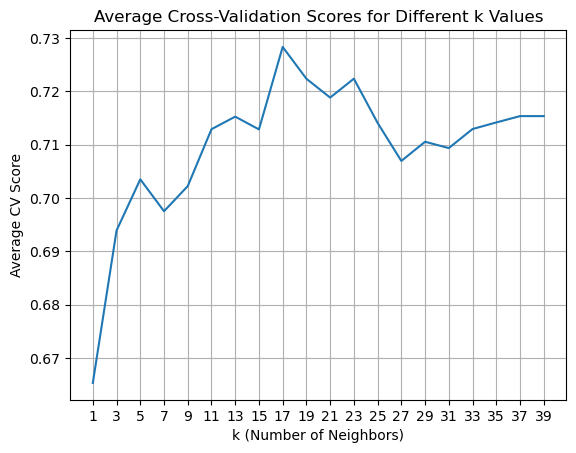

Highest accuracy is obtained for k = 17 and equals 0.7282913165266106


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
# CV

k_avg_score = np.zeros(40)
for k in range(1, 40, 2): # take only odd
    knn_model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_model, scaled_X_train, Y_train, cv=10)
    k_avg_score[k] = cv_scores.mean()
    
best_k = np.argmax(k_avg_score)

import matplotlib.pyplot as plt

# Plot the average scores for odd k values
plt.plot(range(1, 40, 2), k_avg_score[1:40:2])
plt.title('Average Cross-Validation Scores for Different k Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Average CV Score')
plt.xticks(range(1, 40, 2))  # Set x-axis ticks to show only odd k values
plt.grid(True)
plt.show()

print('Highest accuracy is obtained for k =', best_k, 'and equals', max(k_avg_score))

In [30]:
#train a classifier

knn_classifier = KNeighborsClassifier(n_neighbors= best_k) 
knn_classifier.fit(scaled_X_train, Y_train)
print('accuracy of the classifier is', knn_classifier.score(scaled_X_test, Y_test))

accuracy of the classifier is 0.7370892018779343


In [31]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
# Compute a confusion matrix

predictions = knn_classifier.predict(X=scaled_X_test)
# (0,0) = true negatives, (1,0) = false negatives, (1,1) = true positives, (0,1) = false positives
print('confusion matrix: \n', confusion_matrix(y_true=Y_test, y_pred=predictions))

print('precision: ', precision_score(y_true=Y_test, y_pred=predictions, pos_label=1))
print('recall: ', recall_score(y_true=Y_test, y_pred=predictions, pos_label=1))


confusion matrix: 
 [[69 25]
 [31 88]]
precision:  0.7787610619469026
recall:  0.7394957983193278


קיבלנו מסווג עם רמת דיוק של כ74%. כמו כן, הפרסז'ן הוא 78%, והריקול הוא 74%. 
באופן כללי, המסווג דיי טוב ומאוזן בסיווג של מכשירים פופולאריים או לא פופולאריים, אך עם זאת הוא עדיין בעל רמת דיוק של כ74% שזה לא מושלם.
היינו ממליצים לחברות להשתמש במסווג הנ"ל אך להשתמש בו רק על מנת לקבל אינדיקציה ראשונית ולא לקבל החלטות סופיות באמצעותו.

על מנת לשפר את ביצועי המסווג היינו עושים את הדברים הבאים:
1. אוספים נתונים נוספים, היינו רוצים להרחיב את מסד הנתונים עד לשנת 2023. שינוי זה היה מגיד את מספר הנתונים שלנו ולכן המסווג היה מדויק יותר וגם היינו משקפים מגמות חדשניות יותר בשוק.
2. היינו רוצים להשלים את החוסרים עבור המשתנה של מערכות ההפעלה ואז היינו יכולים להוסיך אותו למסווג באמצעות שיטת "קידוד-אחד-חם".
3. במידה והייתה לנו גישה למדינות נוספות, או לפחות למדינה אחת מכל יבשת או אזור בעל מאפיינים תרבותיים דומים היינו יכולים להציג תמונת מצב בינלאומית שלא משקפת רק את המגמות באוקרינה.